In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("DMart.csv")
data.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [5]:
data.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


### What is the number of rows and columns in our data?

In [6]:
# getting number of rows and columns in our data
data.shape

(5189, 9)

### Hence, we can see that there are 5189 rows and 9 columns.

### What's the name of the columns in our data and how many not null values they have, and what is the data type of each column?

In [7]:
# Getting data about columns, like what kind of data type it can holds and non-null value count.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


### we can clearly see that there are 9 columns and two of them contains float data type and rest columns contains object data type

### What is the mathematical description of columns having float data type?

In [8]:
# brief description on price and discount price of data
data.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


#### Now, clearly we can see that the total values in price and discountedPrice columns is 5188 and,
#### mean of Price and DiscountedPrice is 344.03 and 236.669 respectively.
#### Min value is 0 for both the columns
#### Max value for price is 10990 and for DiscountedPrice is 7999.

### what is total unique values in our quantity column?

In [9]:
data["Quantity"].nunique()

632

#### Clearly, we can see that 632 is the total number of unique values.

### Let's see how many null values our data contains?

In [10]:
# checking null values
data.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

### So, we can see that brand column contains the highest number of null values

### let's check for number of duplicated values in our data

In [11]:
# checking duplicated values
data.duplicated().sum()

0

### There is no duplicated value in our data.

### Now we need to deal with null values in our data cause it can affect our analysis.

#### Starting with our name column, we will see the most common name appearing in our column and will fill our null value with that most common value, because number of null values is less, so it is safe to fill most common value in place of our null value. 

In [12]:
data["Name"].mode()

0    Elle 18 Nail Pops Nail Colour - Shade 39
Name: Name, dtype: object

In [13]:
data["Name"].fillna("Elle 18 Nail Pops Nail Colour - Shade 39",inplace = True)

### Hence, null value in our name column is now filled by "Elle 18 Nail Pops Nail Colour - Shade 39"

In [14]:
data["Name"].isna().sum()

0

### We have now dealt with all null values in our name column.

### We will fill null value in our brand column with Local/unknown cause it is difficult to predict the brand and it is also safe to fill like that.

In [14]:
data["Brand"].fillna("Local/Unknown",inplace = True)

In [15]:
data["Brand"].isna().sum()

0

### We will be now checking for price column.

In [16]:
data[data["Price"].isnull() == True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
4323,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,NaN,NaN,Personal Care,Personal Care/Nail Care,5 ml,NaN,Personal Care > Personal Care/Nail Care


### Clearly, we can see that there is one null value and it's sub category is personal care/ Nail care where we can take mean of all type of price having subCategory =Personal Care/Nail Care.

In [17]:
data["Price"] = data["Price"].fillna(data[data["SubCategory"]=="Personal Care/Nail Care"]["Price"].mean())

In [18]:
data["Price"].isna().sum()

0

In [19]:
data["DiscountedPrice"] = data["DiscountedPrice"].fillna(data[data["SubCategory"]=="Personal Care/Nail Care"]["DiscountedPrice"]).mean()

In [20]:
data["DiscountedPrice"].isna().sum()

0

In [21]:
data[data["Category"].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
3180,Stainless Steel Idli Maker with Lid,Keyur Kitchenware,900.0,236.669719,NaN,NaN,1 Unit,\n- Container Material : Stainless Steel\n- Ha...,NaN
3243,Pigeon ESS Non-Stick Gift Set - Red,Pigeon,2895.0,236.669719,NaN,NaN,7 pcs,\n-Specifications :\n- Coating : 5 Layers Non-...,NaN
3245,Wonderchef Milano Set - Red,Wonderchef,4200.0,236.669719,NaN,NaN,4 Pcs,\n- Adorn your kitchen with this beautiful Mil...,NaN


In [22]:
data["Category"] = data["Category"].fillna("Home & Kitchen")

In [23]:
data["Category"].isna().sum()

0

In [24]:
data["SubCategory"] = data["SubCategory"].fillna("Home Appliances")

In [25]:
data["SubCategory"].isna().sum()

0

In [26]:
data["Description"]= data["Description"].fillna("No description")

In [27]:
data["Description"].isna().sum()

0

In [28]:
data["BreadCrumbs"] = data["BreadCrumbs"].fillna("Home & Kitchen > Cookware & Serveware")

In [29]:
data["BreadCrumbs"].isna().sum()

0

In [30]:
data[data["Quantity"].isnull() == True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5047,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,236.669719,Raincoat,Raincoat,NaN,Specifications- Material : Fabric- Colour : Na...,Raincoat


In [31]:
data["Quantity"] = data["Quantity"].fillna("Size XXL")

In [32]:
data["Quantity"].isna().sum()

0

In [33]:
data.isna().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

Distribution in Price


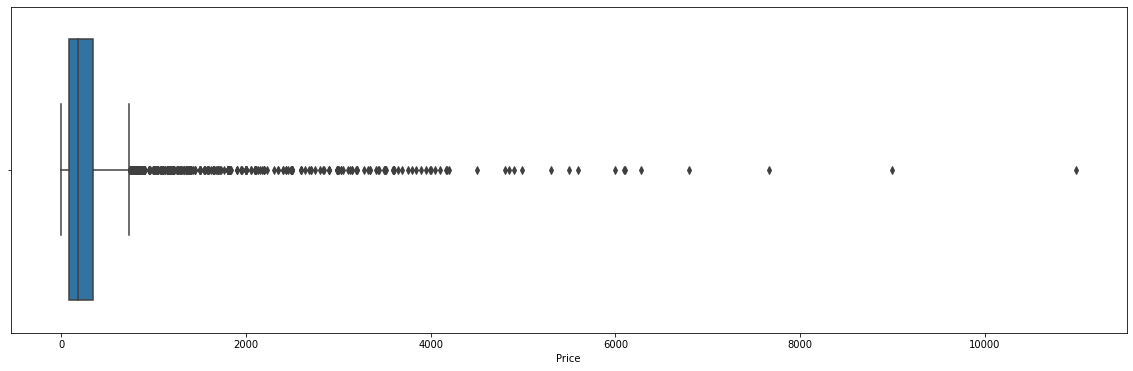

Distribution in DiscountedPrice


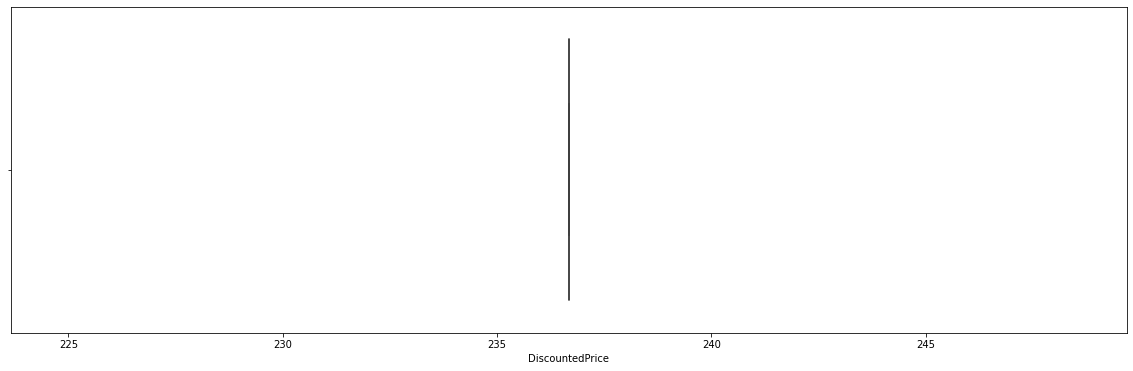

In [34]:
# Checking for outliers
cols = ["Price","DiscountedPrice"]

for i in cols:
    print("Distribution in",i)
    plt.figure(figsize=(20,6))
    sns.boxplot(x=data[i])
    plt.show()

Distribution of Price


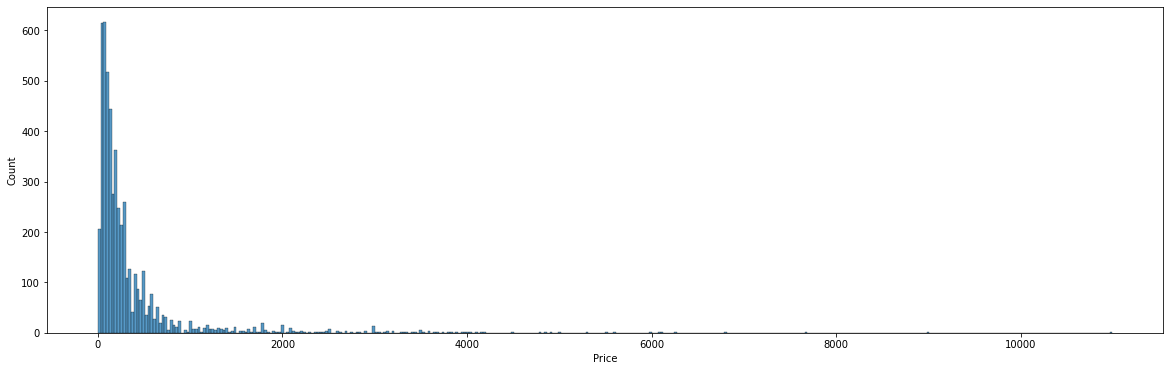

Distribution of DiscountedPrice


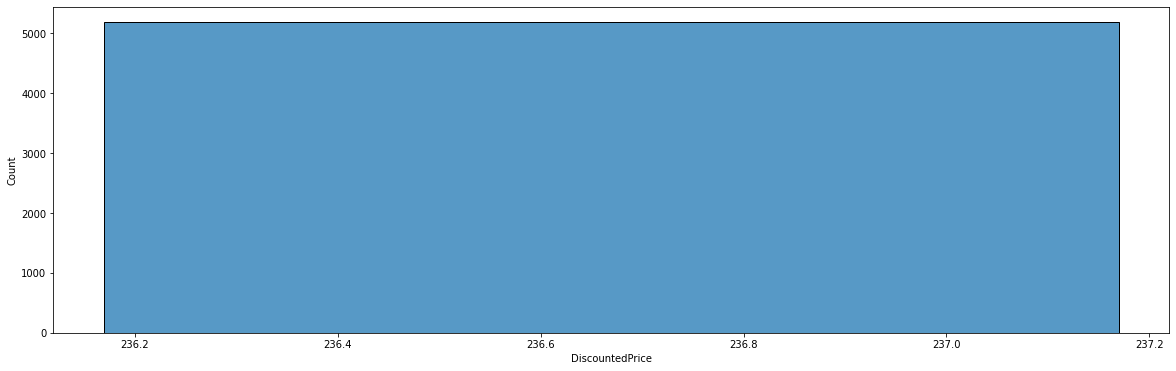

In [35]:
for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.histplot(x = data[i])
    plt.show()

In [36]:
data["Category"].value_counts()

Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    883
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              1
Syska                               1
Water Purifi